# Funciones de distribucion de probabilidad

### Distribucion uniforme

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [16]:
a=1
b=10
n=100000
data=np.random.uniform(a,b,n)

(array([ 9930.,  9840.,  9968.,  9979., 10162.,  9907., 10186.,  9898.,
        10187.,  9943.]),
 array([1.00009129, 1.90007143, 2.80005158, 3.70003173, 4.60001188,
        5.49999202, 6.39997217, 7.29995232, 8.19993247, 9.09991261,
        9.99989276]),
 <a list of 10 Patch objects>)

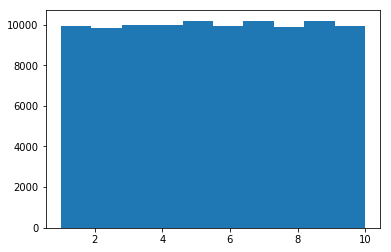

In [17]:
%matplotlib inline 
plt.hist(data)

### Distribucion normal

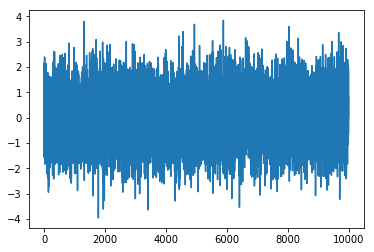

In [24]:
data=np.random.randn(10000)
x=range(1,10001)
plt.plot(x,data)

(array([   9.,   67.,  438., 1471., 2819., 2917., 1603.,  555.,  111.,
          10.]),
 array([-3.96117183, -3.18046056, -2.39974929, -1.61903802, -0.83832676,
        -0.05761549,  0.72309578,  1.50380704,  2.28451831,  3.06522958,
         3.84594085]),
 <a list of 10 Patch objects>)

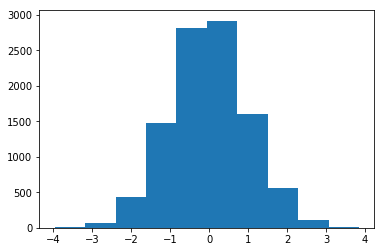

In [25]:
plt.hist(data)

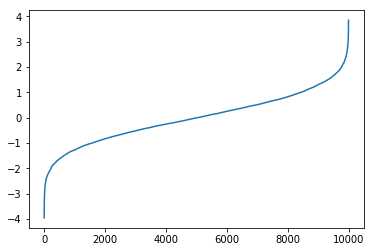

In [26]:
plt.plot(x,sorted(data))

(array([  15.,  163.,  756., 2016., 3048., 2554., 1111.,  294.,   39.,
           4.]),
 array([-3.80888926, -1.82179736,  0.16529454,  2.15238644,  4.13947835,
         6.12657025,  8.11366215, 10.10075405, 12.08784596, 14.07493786,
        16.06202976]),
 <a list of 10 Patch objects>)

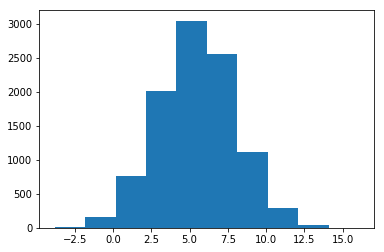

In [27]:
mu=5.5
sd=2.5
data=5.5+2.5*np.random.randn(10000) #z=(x-mu)/sd da
plt.hist(data)

In [28]:
data=np.random.randn(2,4)

In [29]:
data

array([[-0.61376475, -0.24561692,  0.78811104, -0.15991008],
       [-0.70160041,  1.18832226, -1.86606946, -0.58377409]])

## La simulacion de montecarlo

* Generamos dos números aleatorios uniforme x e y entre 0 y 1 en total 1000 veces.
* Calcularemos $z = x^2 + y^2$:
    * Si $z < 1 \rightarrow$ estamos dentro del círculo.
    * Si $z \geq 1 \rightarrow$ estamos fuera del círculo.
* Calculamos el número total de veces que están dentro del círculo y lo dividimos entre el número total de intentos para obtener una aproximación de la probabilidad de caer dentro del círculo.
* Usamos dicha probabilidad para aproximar el valor de π.
* Repetimos el experimento un número suficiente de veces (por ejemplo 100), para obtener (100) diferentes aproximaciones de π. 
* Calculamos el promedio de los 100 experimentos anteriores para dar un valor final de π.
    

In [30]:
def pi_montecarlo(n, n_exp):
    pi_avg = 0
    pi_value_list = []
    for i in range(n_exp):
        value = 0
        x = np.random.uniform(0,1,n).tolist()
        y = np.random.uniform(0,1,n).tolist()
        for j in range(n):
            z = np.sqrt(x[j] * x[j] + y[j] * y[j])
            if z<=1:
                value += 1
        float_value = float(value)
        pi_value = float_value * 4 / n
        pi_value_list.append(pi_value)
        pi_avg += pi_value

    pi = pi_avg/n_exp

    print(pi)
    fig = plt.plot(pi_value_list)
    return (pi, fig)

3.141098000000001


(3.141098000000001, [<matplotlib.lines.Line2D at 0x1f403db2da0>])

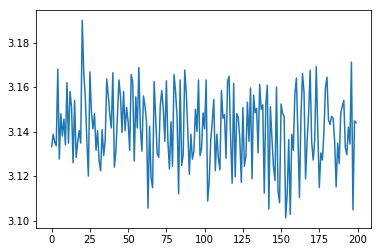

In [31]:
pi_montecarlo(10000, 200)

### Dummy Data Sets

In [5]:
n=1000
data=pd.DataFrame(
{  'A':np.random.randn(n),
    'B':1.5+2.5+np.random.randn(n),
      'C':np.random.uniform(5,32,n)
}

)

In [6]:
data.describe()

,A,B,C
count,1000.000000,1000.000000,1000.000000
mean,-0.010783,3.988198,18.615818
std,1.013731,1.009099,7.768216
min,-2.946449,0.813054,5.021674
25%,-0.672004,3.278813,12.210582
50%,-0.028295,3.968191,18.415884
75%,0.638330,4.744050,25.732571
max,3.559540,7.101384,31.972225


(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10 Patch objects>)

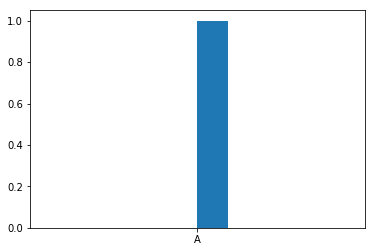

In [7]:
plt.hist("A")

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10 Patch objects>)

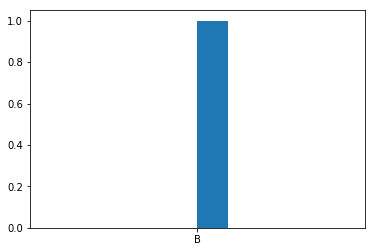

In [8]:
plt.hist("B")

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10 Patch objects>)

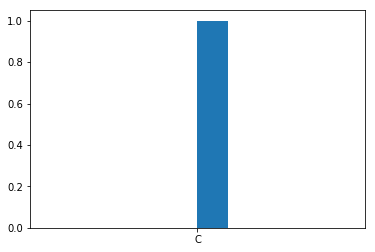

In [9]:
plt.hist("C")

In [10]:
data=pd.read_csv("../python-ml-course/datasets/customer-churn-model/Customer Churn Model.txt")
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [11]:
colum_name=data.columns.values.tolist()

In [12]:
a=len(colum_name)
a

21

In [17]:
new_data=pd.DataFrame(
{
  'Colum_Name': colum_name,
  'A':np.random.rand(a),
  'B':np.random.uniform(0,1,a)
},index=range(42,42+a)
)

In [18]:
new_data

,Colum_Name,A,B
42,State,0.566397,0.025224
43,Account Length,0.574593,0.133593
44,Area Code,0.983813,0.677951
45,Phone,0.462482,0.217258
46,Int'l Plan,0.927350,0.626127
47,VMail Plan,0.680075,0.601313
48,VMail Message,0.041337,0.630729
49,Day Mins,0.371422,0.592674
50,Day Calls,0.600908,0.593448
51,Day Charge,0.758440,0.012808
